(1312, 1164) (1624, 1238)
(656.0, 582.0)


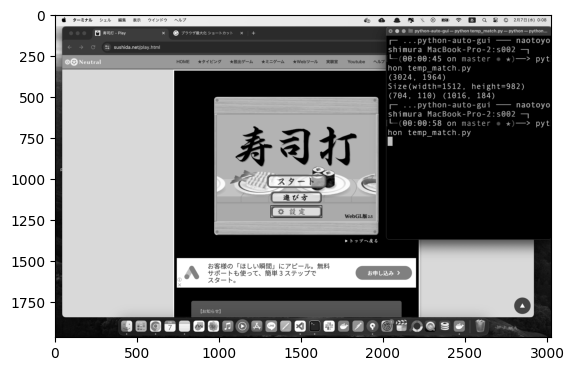

In [9]:
import cv2
import pyautogui as pag
import matplotlib.pyplot as plt


pag.FAILSAFE = True


# 画像のパス
template_path = 'images/template.png'
img_path = 'images/image.png'

# 画面全体のスクリーンショットを撮る
screenshot = pag.screenshot()
screenshot.save(img_path)

# 画面全体のスクリーンショットから設定ボタンの位置を取得する
template = cv2.imread(template_path, 0)
img = cv2.imread(img_path, 0)
result = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result) 

# テンプレートの位置を取得する
template_h, template_w = template.shape
top_left = max_loc
bottom_right = (top_left[0] + template_w, top_left[1] + template_h)
print(top_left, bottom_right)

# スクリーンショット内の設定ボタンを囲う
cv2.rectangle(img, top_left, bottom_right, 0, 2)
plt.imshow(img, cmap='gray')

# スクリーンのサイズを取得する
screen_size = pag.size()

# スクリーンショットのサイズを取得する
screenshot = pag.screenshot()

# top_leftの位置を、スクリーンのサイズに合わせる
top_left = (
    top_left[0] * screen_size[0] / screenshot.width,
    top_left[1] * screen_size[1] / screenshot.height
)
print(top_left)

# 設定ボタンの位置にマウスカーソルを移動する
# pag.moveTo(top_left[0], top_left[1], duration=2)
